# Devin's Exploratory Data Analysis

In [33]:
import json, sqlite3, pprint, folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict
#from watson_developer_cloud import ToneAnalyzerV3

conn = sqlite3.connect('dataset/database.sqlite')

In [5]:
checkins = pd.read_sql_query("select * from checkin", conn)

In [10]:
businesses = pd.read_sql_query("select * from business", conn)

In [32]:
reviews = pd.read_sql_query("select * from review", conn)

In [22]:
users = pd.read_sql_query("select * from user", conn)
users = users[:30]

### Defining functions to style to `users` DataFrame

In [ ]:
def colorize(val):
    '''
    takes a cell value and returns 
    '''
    if type(val) != int:
        return 'black'
    color = 'red' if val > 10 else 'black'
    return 'color: %s' % color

In [ ]:
def highlight_max(s):
    '''
    Takes a pandas Series as input,
    highlights the maximum or maxima in the Series yellow.
    '''
    is_max = s == s.max() # returns sub series which are the maxima
    return ['background-color: yellow' if v else '' for v in is_max]
    # isn't this unnecessary runtime? 1 + len(s) linear passes instead of two

In [37]:
cm = sns.light_palette("green", as_cmap=True)

# on df.style we can chain apply and applymap. applymap works columnwise, apply elementwise
users[:6].style.\
    applymap(colorize).\
    apply(highlight_max).\
    background_gradient(cmap=cm)

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,---1lKK3aKOuomHnwAkAow,Monera,245,2007-06-04 00:00:00,67,22,9,15,3.97,2,3,2,1,0,5,9,9,9,9,0
1,---94vtJ_5o_nikEs6hUjg,Joe,2,2016-05-27 00:00:00,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
2,---cu1hq55BP9DWVXXKHZg,Jeb,57,2009-04-18 00:00:00,34,14,0,0,3.79,0,0,0,0,0,3,2,0,0,0,0
3,---fhiwiwBYrvqhpXgcWDQ,Jed,8,2011-04-20 00:00:00,2,3,1,0,2.78,0,0,0,0,0,0,0,0,0,0,0
4,---PLwSf5gKdIoVnyRHgBA,Rae,2,2015-07-31 00:00:00,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
5,---udAKDsn0yQXmzbWQNSw,Carolyn,43,2014-07-12 00:00:00,1,0,0,1,3.84,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# for i, business in businesses.iterrows():
#     value = len(checkins.loc[checkins['business_id']==business['id']])
#     print (value)
#     businesses.set_value(i, 'checkins', value)

display(checkins[:3])

,business_id,date,count
0,7KPBkxAOEtb3QeIL9PEErg,Thursday-21:00,4
1,7KPBkxAOEtb3QeIL9PEErg,Thursday-1:00,1
2,7KPBkxAOEtb3QeIL9PEErg,Thursday-4:00,1


### Creating a dict (business_id : checkin count)

In [43]:
d = defaultdict(int)

# why do we need i and index?
for (index, checkin) in checkins[:20000].iterrows():
    d[checkin['business_id']] += checkin['count']

In [46]:
# create a new dataframe out of that

l = [(k, v) for (k, v) in d.items()]
f = pd.DataFrame(l)
display(f[:5])

,0,1
0,7KPBkxAOEtb3QeIL9PEErg,113
1,kREVIrSBbtqBhIYkTccQUg,7
2,tJRDll5yqpZwehenzE2cSg,4
3,nhZ1HGWD8lMErdn3FuWuTQ,45
4,vDoXZGE7p6xAkKQ0XQPvoA,2


In [47]:
# dictionary from business id to business name
id_to_name = dict(zip(businesses['id'], businesses['name']))

# dictionary from business id to review count
id_to_review_count = dict(zip(businesses['id'], businesses['review_count']))

# use special df.map function to add these new columns
f['name'] = f[0].map(id_to_name)
f['review_count'] = f[0].map(id_to_review_count)

# now we have
display(f[:5])

,0,1,name,review_count
0,7KPBkxAOEtb3QeIL9PEErg,113,QuikTrip,9
1,kREVIrSBbtqBhIYkTccQUg,7,Richard Petty Driving Experience,3
2,tJRDll5yqpZwehenzE2cSg,4,Ransom Bay Inn B & B,5
3,nhZ1HGWD8lMErdn3FuWuTQ,45,Applebee's,13
4,vDoXZGE7p6xAkKQ0XQPvoA,2,Ahern Catering & Banquet Center,4


**Correlation of checkin count vs review count**

In [49]:
f[1].corr(f['review_count'])

0.76582138460104709

**Self explanatory correlations**

In [50]:
reviews['useful'].corr(reviews['funny'])

0.79930634378351939

In [51]:
reviews['useful'].corr(reviews['cool'])

0.84046368888610179

In [52]:
reviews['funny'].corr(reviews['cool'])

0.84479772294412203

In [60]:
reviews.columns.values

array(['id', 'stars', 'date', 'text', 'useful', 'funny', 'cool',
       'business_id', 'user_id'], dtype=object)

In [82]:
sns.set(style="ticks", color_codes=True)
sns.set_context("poster")
# seaborn is weird here. unlike other plots, pairplot doesn't take an alpha argument. Takes a dictionary of arguments for customizing the plot
fig = sns.pairplot(reviews[['useful','cool','funny']][:2000],kind='reg',plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

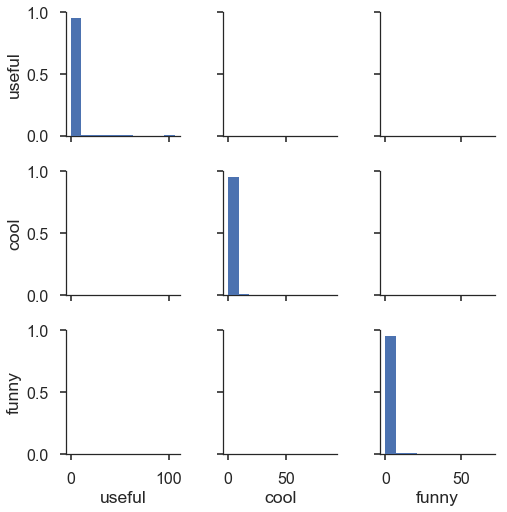

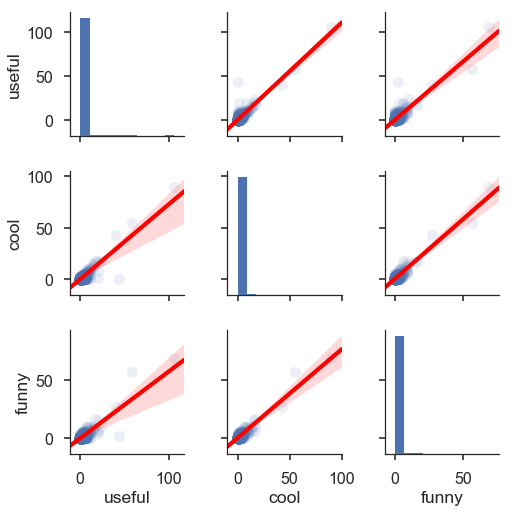

In [83]:
plt.show()